In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from utils import test_model

Using TensorFlow backend.
/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
vocab_size = 142743
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(3, activation=tf.nn.softmax))
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          2283888   
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 2,284,211
Trainable params: 2,284,211
Non-trainable params: 0
_________________________________________________________________


In [3]:
from utils import load_data
X_train, Y_train, X_val, Y_val, X_test, Y_test = load_data()

Invalid sample:
"	

max len: 35
vocab_size: 142743


In [4]:
print(X_train.shape)
print(X_test.shape)

(40267, 35)
(12284, 35)


In [5]:
test_model(model,X_train, Y_train, X_val, Y_val, X_test, Y_test)

Train on 40267 samples, validate on 10067 samples
Epoch 1/10
40267/40267 [==============================] - 4s 109us/step - loss: 1.0076 - acc: 0.5006 - val_loss: 0.9461 - val_acc: 0.5698
Epoch 2/10
40267/40267 [==============================] - 4s 87us/step - loss: 0.8309 - acc: 0.6433 - val_loss: 0.8129 - val_acc: 0.6169
Epoch 3/10
40267/40267 [==============================] - 6s 138us/step - loss: 0.6107 - acc: 0.7477 - val_loss: 0.7753 - val_acc: 0.6412
Epoch 4/10
40267/40267 [==============================] - 4s 111us/step - loss: 0.4202 - acc: 0.8450 - val_loss: 0.7884 - val_acc: 0.6473
Epoch 5/10
40267/40267 [==============================] - 5s 116us/step - loss: 0.2719 - acc: 0.9116 - val_loss: 0.8358 - val_acc: 0.6474
Epoch 6/10
40267/40267 [==============================] - 5s 114us/step - loss: 0.1729 - acc: 0.9511 - val_loss: 0.9019 - val_acc: 0.6414
Epoch 7/10
12284/12284 [==============================] - 0s 16us/step
loss 1.1556979166067838
acc 0.5243406057241334
12284

In [6]:
vocab_size = 142743
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(3, activation=tf.nn.softmax))
model.summary()
model.compile(optimizer=tf.train.AdamOptimizer(),
  loss='binary_crossentropy',
  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          2283888   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 2,284,211
Trainable params: 2,284,211
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, Y_val),
                    verbose=1)

Train on 40267 samples, validate on 10067 samples
Epoch 1/10
40267/40267 [==============================] - 5s 118us/step - loss: 0.5969 - acc: 0.6670 - val_loss: 0.5696 - val_acc: 0.6750
Epoch 2/10
40267/40267 [==============================] - 3s 86us/step - loss: 0.5148 - acc: 0.7477 - val_loss: 0.4930 - val_acc: 0.7532
Epoch 3/10
40267/40267 [==============================] - 3s 78us/step - loss: 0.3893 - acc: 0.8280 - val_loss: 0.4658 - val_acc: 0.7689
Epoch 4/10
40267/40267 [==============================] - 3s 77us/step - loss: 0.2728 - acc: 0.8932 - val_loss: 0.4767 - val_acc: 0.7714
Epoch 5/10
40267/40267 [==============================] - 3s 76us/step - loss: 0.1778 - acc: 0.9392 - val_loss: 0.5034 - val_acc: 0.7697
Epoch 6/10
40267/40267 [==============================] - 3s 76us/step - loss: 0.1132 - acc: 0.9654 - val_loss: 0.5437 - val_acc: 0.7652
Epoch 7/10
40267/40267 [==============================] - 3s 85us/step - loss: 0.0737 - acc: 0.9797 - val_loss: 0.5925 - val_ac

In [8]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names)) #默认输出weighted avg

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



In [9]:
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test, batch_size=128, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)
Y_test_ = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_, Y_pred_bool))

12284/12284 [==============================] - 0s 9us/step
             precision    recall  f1-score   support

          0       0.58      0.58      0.58      5937
          1       0.39      0.62      0.48      2375
          2       0.60      0.39      0.48      3972

avg / total       0.55      0.53      0.53     12284



In [10]:
results = model.evaluate(X_test, Y_test)
print('loss',results[0])
print('acc',results[1])

12284/12284 [==============================] - 0s 19us/step
loss 0.824854491685509
acc 0.6882394520594374


In [11]:
#loss设置成了错误的二分类却得到了最高的准确率?
#实际上不是，https://stackoverflow.com/questions/42081257/keras-binary-crossentropy-vs-categorical-crossentropy-performance
#这种情况下，keras算出来的acc不对！

https://github.com/LCorleone/text_sentiment_classification/blob/master/main.py

In [12]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [13]:
# 建立模型
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(128,dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         18271104  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 18,403,075
Trainable params: 18,403,075
Non-trainable params: 0
_________________________________________________________________


Train on 40267 samples, validate on 10067 samples
Epoch 1/10
40267/40267 [==============================] - 110s 3ms/step - loss: 0.9016 - acc: 0.5587 - val_loss: 0.7956 - val_acc: 0.6246
Epoch 2/10
40267/40267 [==============================] - 105s 3ms/step - loss: 0.6639 - acc: 0.7163 - val_loss: 0.7791 - val_acc: 0.6460
Epoch 3/10
40267/40267 [==============================] - 98s 2ms/step - loss: 0.4923 - acc: 0.8062 - val_loss: 0.8246 - val_acc: 0.6495
Epoch 4/10
40267/40267 [==============================] - 105s 3ms/step - loss: 0.3513 - acc: 0.8684 - val_loss: 0.9608 - val_acc: 0.6189
Epoch 5/10
40267/40267 [==============================] - 105s 3ms/step - loss: 0.2445 - acc: 0.9125 - val_loss: 0.9661 - val_acc: 0.6227
Epoch 6/10
12284/12284 [==============================] - 7s 558us/step
loss 1.1483279107176725
acc 0.5467274503030904
12284/12284 [==============================] - 5s 407us/step
             precision    recall  f1-score   support

          0       0.56     

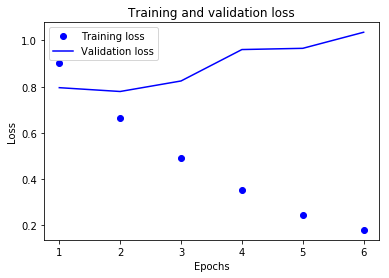

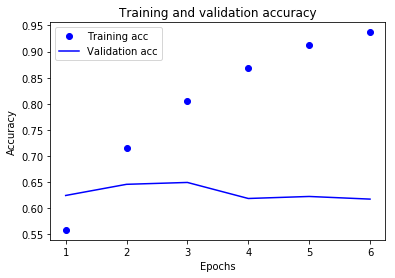

In [14]:
test_model(model,X_train, Y_train, X_val, Y_val, X_test, Y_test,verbose=True)

In [15]:
results = model.evaluate(X_test, Y_test)
print('loss',results[0])
print('acc',results[1])

12284/12284 [==============================] - 7s 584us/step
loss 1.1483279107176725
acc 0.5467274503030904


In [16]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()

        plt.xlim([0,max(history.epoch)])

In [17]:
vocab_size = 142743
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.softmax)) #正则项只会在训练时参与计算，因此测试的loss一般低于训练。
model.summary()
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          2283888   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 2,284,211
Trainable params: 2,284,211
Non-trainable params: 0
_________________________________________________________________


Train on 40267 samples, validate on 10067 samples
Epoch 1/10
40267/40267 [==============================] - 5s 114us/step - loss: 1.0462 - acc: 0.4463 - val_loss: 1.0138 - val_acc: 0.4486
Epoch 2/10
40267/40267 [==============================] - 4s 87us/step - loss: 1.0143 - acc: 0.4670 - val_loss: 0.9922 - val_acc: 0.5233
Epoch 3/10
40267/40267 [==============================] - 4s 97us/step - loss: 0.9652 - acc: 0.5534 - val_loss: 0.9356 - val_acc: 0.5966
Epoch 4/10
40267/40267 [==============================] - 4s 104us/step - loss: 0.8850 - acc: 0.6228 - val_loss: 0.8930 - val_acc: 0.6148
Epoch 5/10
40267/40267 [==============================] - 4s 97us/step - loss: 0.8155 - acc: 0.6637 - val_loss: 0.8747 - val_acc: 0.6204
Epoch 6/10
40267/40267 [==============================] - 4s 93us/step - loss: 0.7523 - acc: 0.7132 - val_loss: 0.8714 - val_acc: 0.6321
Epoch 7/10
40267/40267 [==============================] - 4s 87us/step - loss: 0.7009 - acc: 0.7589 - val_loss: 0.8775 - val_a

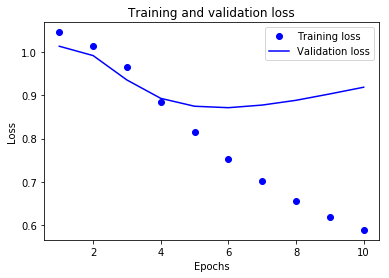

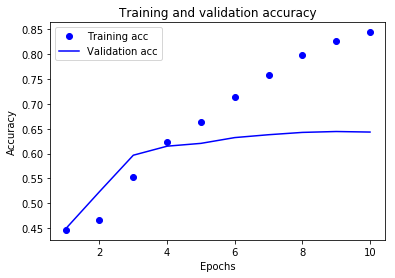

In [18]:
test_model(model,X_train, Y_train, X_val, Y_val, X_test, Y_test,verbose=True)

In [19]:
vocab_size = 142743
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 200))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.softmax)) #正则项只会在训练时参与计算，因此测试的loss一般低于训练。
model.summary()
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 200)         28548600  
_________________________________________________________________
global_average_pooling1d_3 ( (None, 200)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                3216      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 51        
Total params: 28,551,867
Trainable params: 28,551,867
Non-trainable params: 0
________________________________________________________________

Train on 40267 samples, validate on 10067 samples
Epoch 1/10
40267/40267 [==============================] - 53s 1ms/step - loss: 1.0405 - acc: 0.4541 - val_loss: 0.9762 - val_acc: 0.5689
Epoch 2/10
40267/40267 [==============================] - 49s 1ms/step - loss: 0.9228 - acc: 0.5862 - val_loss: 0.8782 - val_acc: 0.6175
Epoch 3/10
40267/40267 [==============================] - 53s 1ms/step - loss: 0.8107 - acc: 0.6615 - val_loss: 0.8523 - val_acc: 0.6232
Epoch 4/10
40267/40267 [==============================] - 64s 2ms/step - loss: 0.7107 - acc: 0.7061 - val_loss: 0.8538 - val_acc: 0.6237
Epoch 5/10
40267/40267 [==============================] - 55s 1ms/step - loss: 0.6265 - acc: 0.7366 - val_loss: 0.8724 - val_acc: 0.6222
Epoch 6/10
40267/40267 [==============================] - 51s 1ms/step - loss: 0.5638 - acc: 0.7750 - val_loss: 0.8982 - val_acc: 0.6258
Epoch 7/10
12284/12284 [==============================] - 0s 30us/step
loss 1.0853586406709317
acc 0.522956691689617
12284/12284

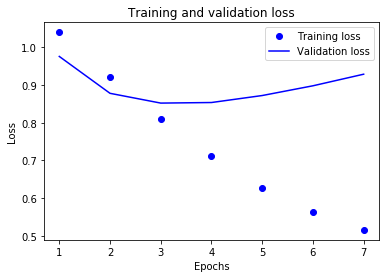

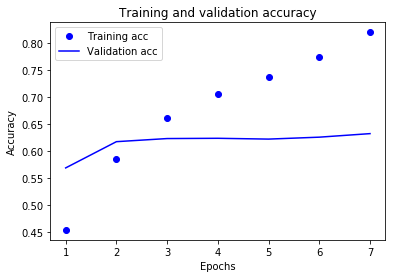

In [20]:
test_model(model,X_train, Y_train, X_val, Y_val, X_test, Y_test,verbose=True)

In [22]:
# https://github.com/cbaziotis/datastories-semeval2017-task4/blob/master/models/nn_models.py

In [23]:
# https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/

不要用tf.keras，目前还有bug

In [24]:
from keras.layers import LSTM,Bidirectional,Embedding,Dropout
from keras.models import Sequential
ocab_size = 142743
model = Sequential()
model.add(Embedding(vocab_size, 200))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128,recurrent_dropout=0.1,recurrent_activation = 'sigmoid')))
model.add(Dense(64, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(3, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.softmax)) #正则项只会在训练时参与计算，因此测试的loss一般低于训练。
model.summary()
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 200)         28548600  
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 28,902,139
Trainable params: 28,902,139
Non-trainable params: 0
________________________________________________________________

Train on 40267 samples, validate on 10067 samples
Epoch 1/10
40267/40267 [==============================] - 147s 4ms/step - loss: 0.9261 - acc: 0.5634 - val_loss: 0.7929 - val_acc: 0.6376
Epoch 2/10
40267/40267 [==============================] - 153s 4ms/step - loss: 0.5769 - acc: 0.7713 - val_loss: 0.8232 - val_acc: 0.6440
Epoch 3/10
40267/40267 [==============================] - 178s 4ms/step - loss: 0.2752 - acc: 0.9055 - val_loss: 0.9731 - val_acc: 0.6224
Epoch 4/10
40267/40267 [==============================] - 148s 4ms/step - loss: 0.1436 - acc: 0.9562 - val_loss: 1.1147 - val_acc: 0.6210
Epoch 5/10
12284/12284 [==============================] - 8s 615us/step
loss 1.510301554796945
acc 0.508629111048454
12284/12284 [==============================] - 7s 603us/step
             precision    recall  f1-score   support

          0       0.58      0.49      0.53      5937
          1       0.40      0.61      0.48      2375
          2       0.52      0.48      0.50      3972

avg / 

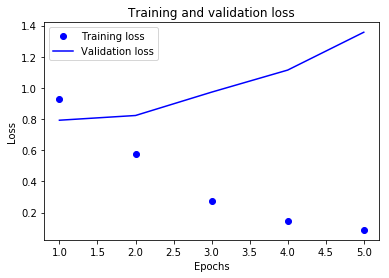

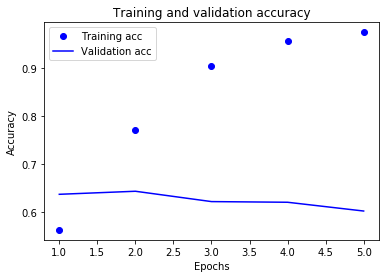

In [25]:
test_model(model,X_train, Y_train, X_val, Y_val, X_test, Y_test,verbose=True)

BiLSTM过拟合很严重。

https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

import numpy as np
import keras
import tensorflow as tf
from keras.layers import LSTM,Bidirectional,Embedding,Dropout,Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from utils import load_data
X_train, Y_train, X_val, Y_val, X_test, Y_test = load_data()

def test_model(model,verbose = False):
    history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, Y_val),
                    verbose=1)
    results = model.evaluate(X_test, Y_test)
    print('loss',results[0])
    print('acc',results[1])
    if verbose:
        history_dict = history.history
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(1, len(acc) + 1)

        # "bo" is for "blue dot"
        plt.figure(0)
        plt.plot(epochs, loss, 'bo', label='Training loss')
        # b is for "solid blue line"
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()
        
        plt.figure(1)
        acc_values = history_dict['acc']
        val_acc_values = history_dict['val_acc']

        plt.plot(epochs, acc, 'bo', label='Training acc')
        plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()
        
        
vocab_size = 142743
model = Sequential()
model.add(Embedding(vocab_size, 200))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100,recurrent_dropout=0.2,recurrent_activation = 'sigmoid'))
model.add(Dense(64, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(3, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.softmax))
model.summary()
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
test_model(model)

embedding_1 (Embedding)      (None, None, 200)         28548600
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          19232
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6464
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195
=================================================================
Total params: 28,627,691
Trainable params: 28,627,691
Non-trainable params: 0
_________________________________________________________________
Train on 40267 samples, validate on 10067 samples
Epoch 1/10
2019-04-13 18:18:38.810158: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
40267/40267 [==============================] - 24s 603us/step - loss: 0.9285 - acc: 0.5534 - val_loss: 0.8016 - val_acc: 0.6296
Epoch 2/10
40267/40267 [==============================] - 23s 562us/step - loss: 0.5041 - acc: 0.8054 - val_loss: 0.8752 - val_acc: 0.6230
Epoch 3/10
40267/40267 [==============================] - 23s 559us/step - loss: 0.1615 - acc: 0.9504 - val_loss: 1.1403 - val_acc: 0.6086
Epoch 4/10
40267/40267 [==============================] - 22s 556us/step - loss: 0.0708 - acc: 0.9837 - val_loss: 1.3891 - val_acc: 0.6048
Epoch 5/10
40267/40267 [==============================] - 23s 559us/step - loss: 0.0412 - acc: 0.9926 - val_loss: 1.5847 - val_acc: 0.6078
Epoch 6/10
40267/40267 [==============================] - 22s 554us/step - loss: 0.0304 - acc: 0.9954 - val_loss: 1.5653 - val_acc: 0.6009
Epoch 7/10
40267/40267 [==============================] - 23s 561us/step - loss: 0.0249 - acc: 0.9967 - val_loss: 1.6710 - val_acc: 0.6054
Epoch 8/10
40267/40267 [==============================] - 23s 562us/step - loss: 0.0198 - acc: 0.9977 - val_loss: 1.6953 - val_acc: 0.6025
Epoch 9/10
40267/40267 [==============================] - 22s 556us/step - loss: 0.0188 - acc: 0.9978 - val_loss: 1.7207 - val_acc: 0.6005
Epoch 10/10
40267/40267 [==============================] - 23s 560us/step - loss: 0.0166 - acc: 0.9981 - val_loss: 1.8360 - val_acc: 0.6026
12284/12284 [==============================] - 2s 133us/step
loss 2.0839636757489486
acc 0.5159557147120777

理解Conv1D:https://stackoverflow.com/questions/43396572/dimension-of-shape-in-conv1d

https://www.programcreek.com/python/example/89676/keras.layers.Conv1D


https://github.com/keras-team/keras/blob/master/examples/imdb_cnn_lstm.py

import numpy as np
import keras
import tensorflow as tf
from keras.layers import LSTM,Bidirectional,Embedding,Dropout,Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from utils import load_data
X_train, Y_train, X_val, Y_val, X_test, Y_test = load_data()

def test_model(model,verbose = False):
    history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, Y_val),
                    verbose=1)
    results = model.evaluate(X_test, Y_test)
    print('loss',results[0])
    print('acc',results[1])
    if verbose:
        history_dict = history.history
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(1, len(acc) + 1)

        # "bo" is for "blue dot"
        plt.figure(0)
        plt.plot(epochs, loss, 'bo', label='Training loss')
        # b is for "solid blue line"
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()
        
        plt.figure(1)
        acc_values = history_dict['acc']
        val_acc_values = history_dict['val_acc']

        plt.plot(epochs, acc, 'bo', label='Training acc')
        plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()
        
        
vocab_size = 142743
model = Sequential()
model.add(Embedding(vocab_size, 200))
model.add(Dropout(0.3))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100,recurrent_dropout=0.2,recurrent_activation = 'sigmoid'))
model.add(Dense(32, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(3, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.softmax))
model.summary()
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
test_model(model)

In [ ]:
#3块GPU跑的

embedding_1 (Embedding)      (None, None, 200)         28548600
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 200)         0
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          19232
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3232
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99
=================================================================
Total params: 28,624,363
Trainable params: 28,624,363
Non-trainable params: 0
_________________________________________________________________
Train on 40267 samples, validate on 10067 samples
Epoch 1/10
2019-04-13 18:03:03.253787: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
40267/40267 [==============================] - 25s 612us/step - loss: 0.9285 - acc: 0.5542 - val_loss: 0.7865 - val_acc: 0.6482
Epoch 2/10
40267/40267 [==============================] - 23s 574us/step - loss: 0.5593 - acc: 0.7803 - val_loss: 0.8260 - val_acc: 0.6390
Epoch 3/10
40267/40267 [==============================] - 23s 575us/step - loss: 0.2266 - acc: 0.9267 - val_loss: 1.1090 - val_acc: 0.6131
Epoch 4/10
40267/40267 [==============================] - 23s 574us/step - loss: 0.0981 - acc: 0.9733 - val_loss: 1.2949 - val_acc: 0.6042
Epoch 5/10
40267/40267 [==============================] - 23s 570us/step - loss: 0.0571 - acc: 0.9874 - val_loss: 1.5603 - val_acc: 0.6040
Epoch 6/10
40267/40267 [==============================] - 23s 566us/step - loss: 0.0393 - acc: 0.9928 - val_loss: 1.6671 - val_acc: 0.5955
Epoch 7/10
40267/40267 [==============================] - 23s 566us/step - loss: 0.0316 - acc: 0.9947 - val_loss: 1.8620 - val_acc: 0.6004
Epoch 8/10
40267/40267 [==============================] - 23s 573us/step - loss: 0.0273 - acc: 0.9961 - val_loss: 1.8006 - val_acc: 0.6010
Epoch 9/10
40267/40267 [==============================] - 23s 567us/step - loss: 0.0240 - acc: 0.9964 - val_loss: 1.8105 - val_acc: 0.5924
Epoch 10/10
40267/40267 [==============================] - 23s 567us/step - loss: 0.0209 - acc: 0.9974 - val_loss: 1.9575 - val_acc: 0.5955
12284/12284 [==============================] - 2s 134us/step
loss 2.2763141728658622
acc 0.4736242266265704

In [ ]:
#也可以试试model.add(GRU(units = 32,dropout = 0.2,recurrent_dropout = 0.2))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         28548600  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 80)          64080     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 80)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 243       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 28,612,923
Trainable params: 28,612,923
Non-trainable params: 0
_________________________________________________________________
Train on 40267 samples, validate on 10067 samples
Epoch 1/10
40267/40267 [==============================] - 103s 3ms/step - loss: 

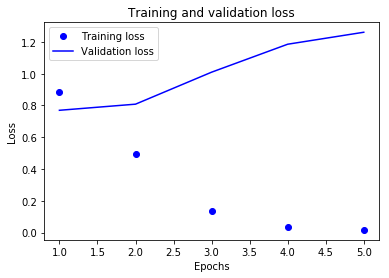

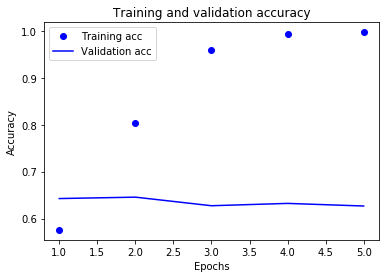

In [28]:
from keras.layers.convolutional import Conv1D
from keras.layers import GlobalMaxPooling1D,Activation
model = Sequential()
model.add(Embedding(input_dim =vocab_size, output_dim=200, mask_zero = False))
model.add(Conv1D(activation="relu",
                 filters=80, kernel_size=4, padding="valid")) #Layer conv1d_1 does not support masking
# we use max pooling:
model.add(GlobalMaxPooling1D())
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
test_model(model,X_train, Y_train, X_val, Y_val, X_test, Y_test,verbose=True)

In [ ]:
from keras.layers import Conv1D, Conv2D
import keras.backend as K
import numpy as np

# create an input with 4 steps and 5 channels/input_dim
channels = 5
steps = 4
filters = 3
val = np.array([list(range(i * channels, (i + 1) * channels)) for i in range(1, steps + 1)])
val = np.expand_dims(val, axis=0)
x = K.variable(value=val)

# 1D convolution. Initialize the kernels to ones so that it's easier to compute the result by hand

conv1d = Conv1D(filters=filters, kernel_size=1, kernel_initializer='ones')(x)

# 2D convolution that replicates the 1D one

# need to add a dimension to your input since conv2d expects 4D inputs. I add it at axis 4 since my keras is setup with `channel_last`
val1 = np.expand_dims(val, axis=3)
x1 = K.variable(value=val1)

conv2d = Conv2D(filters=filters, kernel_size=(1, 5), kernel_initializer='ones')(x1)

# evaluate and print the outputs
print(K.eval(x))
print(K.eval(conv1d))
print(K.eval(conv2d))

Conv1D kernel_size为1，那么一个卷积是对一行对应相乘并相加。kernel_size为2，那么一个卷积是对相邻2行对应相乘并相加。

In [29]:
from keras.constraints import maxnorm
from keras.engine import Input
from keras.engine import Model
from keras.layers import Dropout, Dense, Bidirectional, LSTM, \
    Embedding, GaussianNoise, Activation, Flatten, \
    RepeatVector, MaxoutDense, GlobalMaxPooling1D, \
    Convolution1D, MaxPooling1D, concatenate, Conv1D,GaussianNoise
from keras.regularizers import l2

In [30]:
def cnn_multi_filters(filter_size = [2,3,4], num_filters = 50):
    input_text = Input(shape=(35,), dtype='int32')
    emb_text = Embedding(input_dim =vocab_size, output_dim=200, mask_zero = False)(input_text)
#     emb_text = GaussianNoise(noise)(emb_text)
    emb_text = Dropout(0.5)(emb_text)

    pooling_reps = []
    for i in filter_size:
        feat_maps = Convolution1D(nb_filter=num_filters,
                                  filter_length=i,
                                  border_mode="valid",
                                  activation="relu",
                                  subsample_length=1)(emb_text)
        pool_vecs = MaxPooling1D(pool_length=2)(feat_maps)
        pool_vecs = Flatten()(pool_vecs)
        # pool_vecs = GlobalMaxPooling1D()(feat_maps)
        pooling_reps.append(pool_vecs)

    representation = concatenate(pooling_reps)

    representation = Dropout(0.5)(representation)

    probabilities = Dense(3, activation='softmax',
                          activity_regularizer=l2(0.001))(representation)

    model = Model(input=input_text, output=probabilities)
    model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

    return model

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=50, kernel_size=2, strides=1, padding="valid")`
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=50, kernel_size=3, strides=1, padding="valid")`
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=50, kernel_size=4, strides=1, padding="valid")`
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tens

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 35, 200)      28548600    input_1[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 35, 200)      0           embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 34, 50)       20050       dropout_3[0][0]                  
__________________________________________________________________________________________________
conv1d_4 (

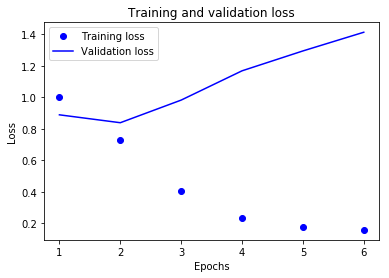

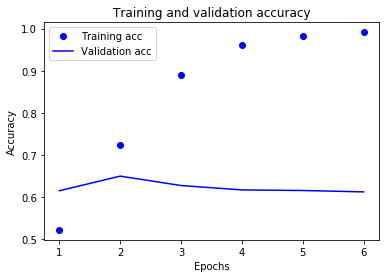

In [31]:
model = cnn_multi_filters()
model.summary()
test_model(model,X_train, Y_train, X_val, Y_val, X_test, Y_test,verbose=True)

(venv) ffding@e4:~/code/k/wxj-course/course-project/语义计算与知识检索/assignment2/src$ CUDA_VISIBLE_DEVICES=0,1,2,3,4  python main.py
Using TensorFlow backend.
/home/ffding/code/k/venv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Invalid sample:
"

max len: 35
vocab_size: 142743
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
input_1 (InputLayer)         (None, 35)                0
_________________________________________________________________
embedding_1 (Embedding)      (None, 35, 200)           28548600
_________________________________________________________________
bidirectional_1 (Bidirection (None, 35, 256)           336896
_________________________________________________________________
attention_1 (Attention)      (None, 256)               292
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771
=================================================================
Total params: 28,886,559
Trainable params: 28,886,559
Non-trainable params: 0
        Y.extend(Y_)
_________________________________________________________________
Train on 40267 samples, validate on 10067 samples
Epoch 1/10
2019-04-13 22:06:45.300023: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
40267/40267 [==============================] - 68s 2ms/step - loss: 0.9275 - acc: 0.5413 - val_loss: 0.7849 - val_acc: 0.6326
Epoch 2/10
40267/40267 [==============================] - 66s 2ms/step - loss: 0.5221 - acc: 0.7840 - val_loss: 0.8756 - val_acc: 0.6247
Epoch 3/10
40267/40267 [==============================] - 67s 2ms/step - loss: 0.1668 - acc: 0.9416 - val_loss: 1.1389 - val_acc: 0.6097
Epoch 4/10
40267/40267 [==============================] - 66s 2ms/step - loss: 0.0665 - acc: 0.9784 - val_loss: 1.3597 - val_acc: 0.6154
12284/12284 [==============================] - 4s 362us/step
loss 1.3317078666398208
acc 0.5512048192479951
(venv) ffding@e4:~/code/k/wxj-course/course-project/语义计算与知识检索/assignment2/src$ ls
draft.ipynb  main.py  model.py  __pycache__  utils.py
(venv) ffding@e4:~/code/k/wxj-course/course-project/语义计算与知识检索/assignment2/src$ vim utils.py
(venv) ffding@e4:~/code/k/wxj-course/course-project/语义计算与知识检索/assignment2/src$ CUDA_VISIBLE_DEVICES=0,1,2,3,4  python main.py
Using TensorFlow backend.
/home/ffding/code/k/venv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Invalid sample:
"

max len: 35
vocab_size: 142743
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
input_1 (InputLayer)         (None, 35)                0
_________________________________________________________________
embedding_1 (Embedding)      (None, 35, 200)           28548600
_________________________________________________________________
bidirectional_1 (Bidirection (None, 35, 256)           336896
_________________________________________________________________
attention_1 (Attention)      (None, 256)               292
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771
=================================================================
Total params: 28,886,559
Trainable params: 28,886,559
Non-trainable params: 0
_________________________________________________________________
Train on 40267 samples, validate on 10067 samples
Epoch 1/10
2019-04-13 22:15:21.378798: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
40267/40267 [==============================] - 69s 2ms/step - loss: 0.9107 - acc: 0.5541 - val_loss: 0.7809 - val_acc: 0.6386
Epoch 2/10
40267/40267 [==============================] - 66s 2ms/step - loss: 0.4911 - acc: 0.8022 - val_loss: 0.8492 - val_acc: 0.6298
Epoch 3/10
40267/40267 [==============================] - 66s 2ms/step - loss: 0.1509 - acc: 0.9462 - val_loss: 1.1740 - val_acc: 0.6059
Epoch 4/10
40267/40267 [==============================] - 66s 2ms/step - loss: 0.0572 - acc: 0.9808 - val_loss: 1.4479 - val_acc: 0.5992
Epoch 5/10
40267/40267 [==============================] - 67s 2ms/step - loss: 0.0294 - acc: 0.9915 - val_loss: 1.5738 - val_acc: 0.6025
Epoch 6/10
40267/40267 [==============================] - 66s 2ms/step - loss: 0.0179 - acc: 0.9955 - val_loss: 1.7123 - val_acc: 0.5899
12284/12284 [==============================] - 4s 353us/step
loss 1.6460014782756207
acc 0.5360631715859314

In [ ]:
#训练三个epoch，acc大概是0.55


max len: 35
vocab_size: 142743
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
input_1 (InputLayer)         (None, 35)                0
_________________________________________________________________
embedding_1 (Embedding)      (None, 35, 200)           28548600
_________________________________________________________________
bidirectional_1 (Bidirection (None, 35, 256)           336896
_________________________________________________________________
bidirectional_2 (Bidirection (None, 35, 256)           394240
_________________________________________________________________
attention_1 (Attention)      (None, 256)               292
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771
=================================================================
Total params: 29,280,799
Trainable params: 29,280,799
Non-trainable params: 0
_________________________________________________________________
Train on 40267 samples, validate on 10067 samples
Epoch 1/10
2019-04-14 13:55:32.403509: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
40267/40267 [==============================] - 91s 2ms/step - loss: 1.0610 - acc: 0.4468 - val_loss: 1.0373 - val_acc: 0.4496
Epoch 2/10
40267/40267 [==============================] - 88s 2ms/step - loss: 0.9473 - acc: 0.5116 - val_loss: 0.8153 - val_acc: 0.6167
Epoch 3/10
40267/40267 [==============================] - 88s 2ms/step - loss: 0.6470 - acc: 0.7146 - val_loss: 0.8113 - val_acc: 0.6346
Epoch 4/10
40267/40267 [==============================] - 88s 2ms/step - loss: 0.2797 - acc: 0.8939 - val_loss: 0.9976 - val_acc: 0.6181
Epoch 5/10
40267/40267 [==============================] - 89s 2ms/step - loss: 0.1180 - acc: 0.9592 - val_loss: 1.3248 - val_acc: 0.6156
Epoch 6/10
40267/40267 [==============================] - 88s 2ms/step - loss: 0.0579 - acc: 0.9812 - val_loss: 1.8527 - val_acc: 0.6072
Epoch 7/10
40267/40267 [==============================] - 88s 2ms/step - loss: 0.0345 - acc: 0.9896 - val_loss: 1.9542 - val_acc: 0.6066
12284/12284 [==============================] - 8s 685us/step
loss 2.0124366186760567
acc 0.5616248778705293
12284/12284 [==============================] - 5s 381us/step
             precision    recall  f1-score   support

          0       0.56      0.73      0.64      5937
          1       0.54      0.41      0.47      2375
          2       0.58      0.40      0.47      3972

avg / total       0.56      0.56      0.55     12284

_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
input_1 (InputLayer)         (None, 35)                0
_________________________________________________________________
embedding_1 (Embedding)      (None, 35, 200)           28548600
_________________________________________________________________
bidirectional_1 (Bidirection (None, 35, 256)           336896
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               394240
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771
=================================================================
Total params: 29,280,507
Trainable params: 29,280,507
Non-trainable params: 0
_________________________________________________________________
Train on 40267 samples, validate on 10067 samples
Epoch 1/10
2019-04-14 16:11:54.542551: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
40267/40267 [==============================] - 87s 2ms/step - loss: 1.0339 - acc: 0.4608 - val_loss: 0.9116 - val_acc: 0.5382
Epoch 2/10
40267/40267 [==============================] - 84s 2ms/step - loss: 0.7381 - acc: 0.6618 - val_loss: 0.7731 - val_acc: 0.6449
Epoch 3/10
40267/40267 [==============================] - 84s 2ms/step - loss: 0.2633 - acc: 0.9007 - val_loss: 1.0012 - val_acc: 0.6093
Epoch 4/10
40267/40267 [==============================] - 85s 2ms/step - loss: 0.0794 - acc: 0.9726 - val_loss: 1.3421 - val_acc: 0.6032
Epoch 5/10
40267/40267 [==============================] - 84s 2ms/step - loss: 0.0349 - acc: 0.9886 - val_loss: 1.5002 - val_acc: 0.6066
Epoch 6/10
40267/40267 [==============================] - 84s 2ms/step - loss: nan - acc: 0.4845 - val_loss: nan - val_acc: 0.4404
12284/12284 [==============================] - 8s 674us/step
loss nan
acc 0.48331162485848106
12284/12284 [==============================] - 4s 361us/step
/home/ffding/code/k/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
             precision    recall  f1-score   support

          0       0.48      1.00      0.65      5937
          1       0.00      0.00      0.00      2375
          2       0.00      0.00      0.00      3972

avg / total       0.23      0.48      0.31     12284
